# <span style="color:orange"> Laboratorio di Simulazione Numerica </span>
## <span style="color:orange"> Esercitazione 2 </span>

### Paolo Panatti (12606A)

### <font color="blue"> Esercizio 02.1

#### Obiettivo:
Calcolare tramite tecniche Monte Carlo il seguente integrale monodimensionale:
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$
1. campionando una distribuzione uniforme nell'intervallo $\left[0,1\right)$
2. utilizzando importance sampling

#### 1. Metodo della media
Questo metodo consiste nel generare $N$ numeri casuali $x_i$ distribuiti uniformemente nell'intervallo $\left[0,1\right)$ e quindi stimare l'integrale $I$ come media dei valori della funzione integranda $f(x)$ nei punti $x_i$:
$$I \simeq \frac{1}{N} \sum_{i=1}^N f(x_i)$$

#### 2. Importance sampling
Per ottenere una stima più precisa dell'integrale possiamo ricorrere alla tecnica dell'**importance sampling**. Innanzitutto, fattorizziamo la funzione integranda $f(x)$ nel prodotto $f(x) = g(x)p(x)$, dove $p(x)$ è una distribuzione di probabilità e $g(x) = f(x)/p(x)$. In particolare, scegliamo una distribuzione di probabilità $p(x)$ che assomigli il più possibile alla funzione integranda $f(x)$. Nel caso in questione, ho deciso di utilizzare l'espansione di Taylor al primo ordine attorno a $x=1$ opportunamente normalizzata, ossia $p(x) = 2(1-x)$, e dunque risulta $g(x) = \frac{\pi}{4} \frac{\cos(\pi x/2)}{1-x}$. A questo punto, campionando $N$ numeri casuali $x_i$ distribuiti secondo $p(x)$, il valore dell'integrale è dato da $I \simeq \frac{1}{N} \sum_{i=1}^N g(x_i)$.

Per campionare la distribuzione di probabilità $p(x)$ ho sfruttato il metodo di inversione della funzione cumulativa, ottenendo che se $y$ è un numero casuale distribuito uniformemente tra $0$ e $1$, allora $x = 1 - \sqrt{1-y}$ è un numero casuale distribuito secondo $p(x)$.

Questa tecnica consente di ridurre la varianza dal momento che, avendo scelto $p(x)$ simile a $f(x)$, vengono campionati con più probabilità i punti in cui la funzione $f(x)$ dà un contributo significativo all'integrale, mentre vengono minimizzati i contributi irrilevanti che aggiungono solo rumore.

In entrambi i casi, per valutare le incertezze statistiche ho utilizzato il metodo data blocking con un numero totale di lanci pari a $M=10^5$, suddivisi in $N=100$ blocchi. Riporto qui in basso i due grafici che mostrano l'andamento di valor medio e incertezza progressivi in funzione del numero di lanci.

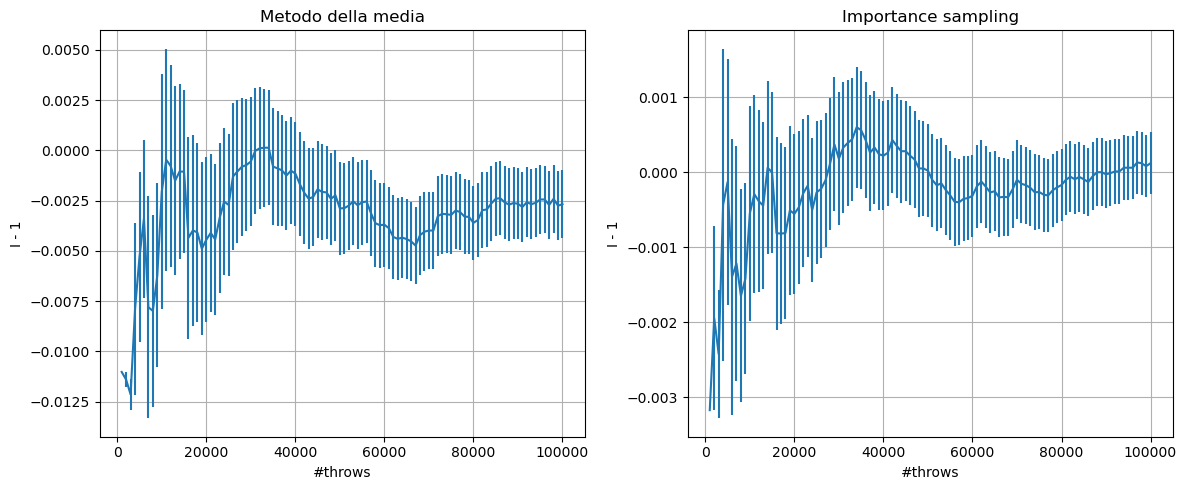

In [79]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

M, N = np.loadtxt("Es1/data1.dat", max_rows=1, usecols=(0,1), delimiter=' ', unpack='true')
L = int(M/N)
x = np.arange(N)+1
x *= L

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sum_prog1, err_prog1 = np.loadtxt("Es1/data1.dat", skiprows=1, usecols=(0,1), delimiter=' ', unpack='true')
axs[0].errorbar(x, sum_prog1 - 1, yerr=err_prog1)
axs[0].set_xlabel('#throws')
axs[0].set_ylabel('I - 1')
axs[0].set_title('Metodo della media')
axs[0].grid(True)

sum_prog2, err_prog2 = np.loadtxt("Es1/data2.dat", usecols=(0,1), delimiter=' ', unpack='true')
axs[1].errorbar(x, sum_prog2 - 1, yerr=err_prog2)
axs[1].set_xlabel('#throws')
axs[1].set_ylabel('I - 1')
axs[1].set_title('Importance sampling')
axs[1].grid(True)

plt.tight_layout()

plt.show()

Entrambe le stime risultano compatibili con il valore esatto (la prima entro $2\sigma$). Inoltre, come previsto, nel secondo caso si osserva chiaramente una riduzione dell'incertezza, di circa un ordine di grandezza.

### <font color="blue"> Esercizio 02.2

#### Obiettivo:
Simulare un Random Walk (RW) in 3D su un reticolo cubico e nel continuo.

#### Random Walk
Un Random Walk è la formalizzazione matematica di una traiettoria che consiste in una sequenza di passi in direzioni casuali. Si tratta di una *catena di Markov*, ossia di un processo stocastico senza memoria, in cui la probabilità dello stato futuro dipende solo dallo stato attuale e non dalla storia complessiva del processo. È possibile dimostrare, inoltre, che la distribuzione di probabilità del processo soddisfa un'equazione di diffusione.

#### 1. Random Walk su reticolo cubico
Il walker parte dall'origine e ad ogni istante di tempo discreto si muove di $a=1$ (passo del reticolo) in avanti o indietro lungo uno dei tre assi principali del reticolo: $x$, $y$ o $z$. Direzione e verso dello spostamento sono determinati dall'estrazione di un numero casuale distribuito uniformemente nell'intervallo $\left[0,1\right)$, equamente suddiviso in sei sottointervalli, a seconda del sottointervallo in cui cade. Per tenere traccia della posizione del walker ho utilizzato un vettore a sei componenti, dove ogni componente registra lo spostamento totale lungo la direzione positiva o negativa di ciascun asse rispettivamente. Dunque, ad ogni step, viene incrementata di $a=1$ la componente del vettore corrispondente al sottointervallo in cui cade il numero casuale.

#### 2. Random Walk nel continuo
Il walker parte dall'origine e ad ogni istante di tempo discreto si muove di $a=1$ lungo una direzione casuale ottenuta campionando uniformemente l'angolo solido: $\theta \in \left[0,\pi\right]$ e $\phi \in \left[0,2\pi\right]$. I valori di $\phi$ sono distribuiti uniformemente tra $0$ e $2\pi$, mentre i valori di $\theta$ seguono la distribuzione $p(\theta) = \frac{1}{2} \sin(\theta)$ tra $0$ e $\pi$ per via del fattore Jacobiano. Per campionare $\theta$ occorre quindi generare un numero casuale $r$ distribuito uniformemente tra $0$ e $1$ e calcolare $\cos^{-1}(1-2r)$ (inversione funzione cumulativa).

L'esercizio chiedeva di rappresentare per entrambi i Random Walks la distanza media dall'origine $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ e la relativa incertezza statistica in funzione del passo $i \in \left[0,100\right]$. Per farlo ho ripetuto la simulazione $M=10^5$ volte e applicato il metodo data blocking suddividendo il numero totale di lanci in $N=100$ blocchi. Di seguito i grafici ottenuti:

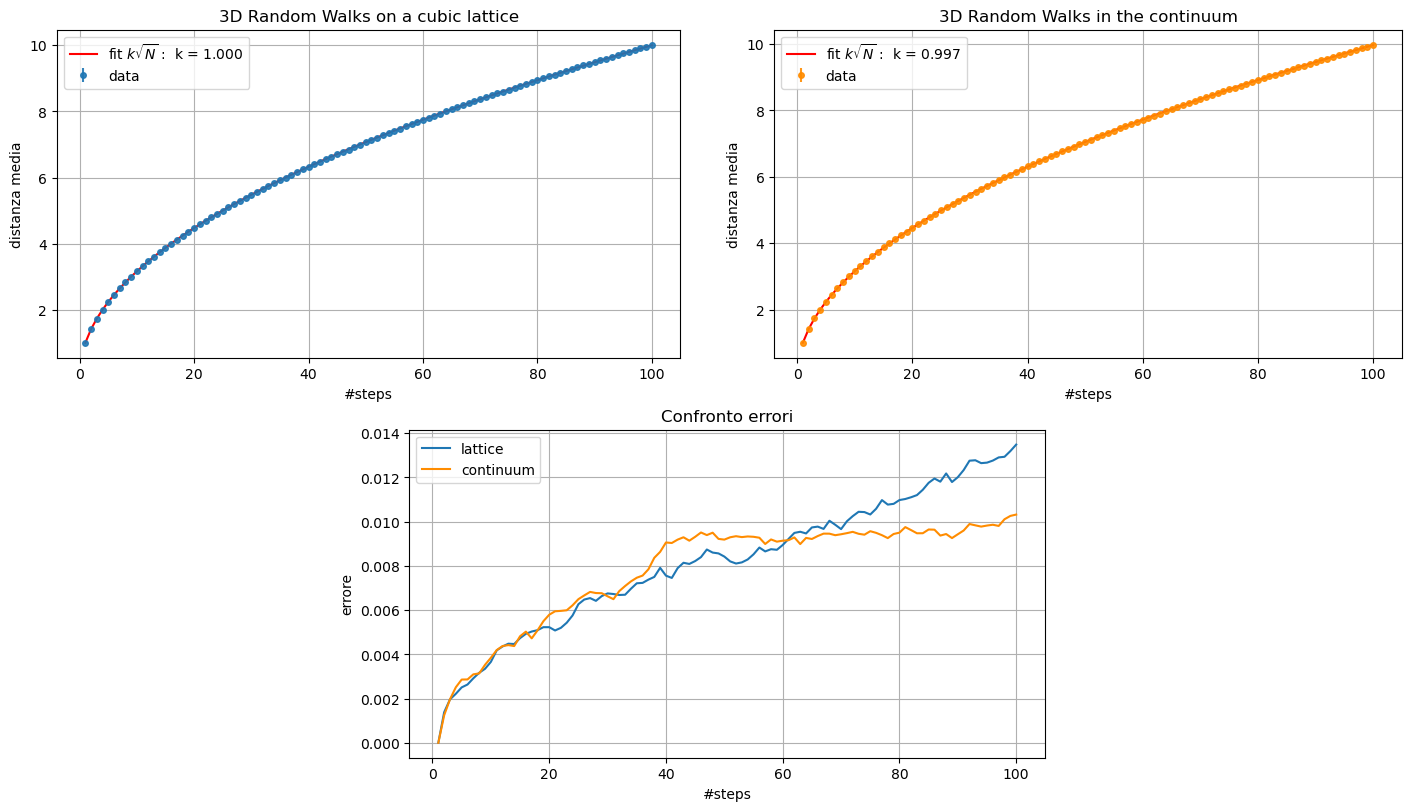

In [68]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib.gridspec import GridSpec
from scipy.optimize import curve_fit

x = np.arange(100) + 1
dist1, err1 = np.loadtxt("Es2/data1.dat", usecols=(0,1), delimiter=' ', unpack='true')
dist2, err2 = np.loadtxt("Es2/data2.dat", usecols=(0,1), delimiter=' ', unpack='true')

def fit_func(N, k):
    return k * np.sqrt(N)

popt1, pcov1 = curve_fit(fit_func, x, dist1)
popt2, pcov2 = curve_fit(fit_func, x, dist2)

fit1 = fit_func(x, *popt1)
fit2 = fit_func(x, *popt2)

fig = plt.figure(figsize=(14, 8), constrained_layout=True)
gs = GridSpec(2, 4, figure=fig)

ax1 = fig.add_subplot(gs[0, 0:2])
ax1.errorbar(x, dist1, yerr=err1, fmt='o', markersize=4, alpha=0.9, label='data')
ax1.plot(x, fit1, 'r-', label=rf'fit $k\sqrt{{N}}$ :  k = {popt1[0]:.3f}')
ax1.set_title('3D Random Walks on a cubic lattice')
ax1.set_xlabel('#steps')
ax1.set_ylabel('distanza media')
ax1.grid(True)
ax1.legend()

ax2 = fig.add_subplot(gs[0, 2:4])
ax2.errorbar(x, dist2, yerr=err2, fmt='o', markersize=4, alpha=0.9, color='darkorange', label='data')
ax2.plot(x, fit2, 'r-', label=rf'fit $k\sqrt{{N}}$ :  k = {popt2[0]:.3f}')
ax2.set_title('3D Random Walks in the continuum')
ax2.set_xlabel('#steps')
ax2.set_ylabel('distanza media')
ax2.grid(True)
ax2.legend()

ax3 = fig.add_subplot(gs[1, 1:3])
ax3.plot(x, err1, label='lattice')
ax3.plot(x, err2, color='darkorange', label='continuum')
ax3.set_title('Confronto errori')
ax3.set_xlabel('#steps')
ax3.set_ylabel('errore')
ax3.legend()
ax3.grid(True)

plt.show()

Come suggerito, ho eseguito un fit di entrambi i risultati con una funzione del tipo $f(N) = k\sqrt{N}$, ottenendo valori del parametro $k$ prossimi a $1$. Questo andamento rispecchia correttamente il comportamento diffusivo tipico di un Random Walk. 
Il terzo grafico, infine, mostra l'andamento dell'errore, non visibile nei primi due, in funzione del passo $i$ per entrambi i casi, discreto e continuo. Si osserva, in particolare, una crescita dell'incertezza dovuta al fatto che all'aumentare del numero di passi aumenta il numero di traiettorie possibili e di conseguenza anche la dispersione delle distanze.